WNIXALO | 20181104 | General Work Notebook 1

---

The maximum private score achieved in this notebook is **0.62860 (855/938)** (corresponding to the 0.62926 score)

## Multi-label prediction with Planet Amazon dataset

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Getting the data

The planet dataset isn't available on the [fastai dataset page](https://course.fast.ai/datasets) due to copyright restrictions. You can download it from Kaggle however. Let's see how to do this by using the [Kaggle API](https://github.com/Kaggle/kaggle-api) as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal. Depending on your environment, you may need to append "--user" to the command.

In [3]:
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /opt/anaconda3/lib/python3.6/site-packages (1.5.0)


Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands.

In [5]:
# ! mkdir -p ~/.kaggle/
# ! mv kaggle.json ~/.kaggle/

You're all set to download the data from [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space). You just need to go to its main page and accept its rules, and run the two cells below (uncomment the shell commands to download and unzip the data).

In [3]:
Path(Config.get_key('data_path'))

PosixPath('~/.fastai/data')

In [4]:
Path(Config.get_key('data_path')).expanduser()

PosixPath('/home/jupyter/.fastai/data')

In [5]:
path = Path(Config.get_key('data_path')).expanduser()/'planet'
os.makedirs(path, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/planet')

In [10]:
! chmod 600 /home/jupyter/.kaggle/kaggle.json

In [6]:
! cat ~/.kaggle/kaggle.json

{"username":"wnixalo","key":"bdfde0108f74fe1500d389bb72df0467"}

In [17]:
# ! mv kaggle.json /home/jupyter/.kaggle/
# ! chmod 600 /home/jupyter/.kaggle/kaggle.json

In [11]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test_v2_file_mapping.csv -p {path}
! unzip {path}/train_v2.csv.zip -d {path}
! unzip {path}/test_v2_file_mapping.csv.zip -d {path}

100%|████████████████████████████████████████▉| 599M/600M [00:05<00:00, 108MB/s]
100%|█████████████████████████████████████████| 600M/600M [00:05<00:00, 115MB/s]
 99%|███████████████████████████████████████▋| 598M/603M [00:04<00:00, 86.8MB/s]
100%|█████████████████████████████████████████| 603M/603M [00:04<00:00, 128MB/s]
  0%|                                                | 0.00/159k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 159k/159k [00:00<00:00, 90.5MB/s]
  0%|                                                | 0.00/110k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 110k/110k [00:00<00:00, 60.5MB/s]
Archive:  /home/jupyter/.fastai/data/planet/train_v2.csv.zip
  inflating: /home/jupyter/.fastai/data/planet/train_v2.csv  
   creating: /home/jupyter/.fastai/data/planet/__MACOSX/
  inflating: /home/jupyter/.fastai/data/planet/__MACOSX/._train_v2.csv  
Archive:  /home/jupyter/.fastai/data/planet/test_v2_file_mapping.csv.zip
  inflating: /home/jupyter

To extract the content of this file, we'll need 7zip, so uncomment the following line if you need to install it.

In [12]:
# ! sudo apt-get install p7zip-full --yes

And now we can finally unpack the data.

In [13]:
! 7za -bd -y x {path}/train-jpg.tar.7z -o{path}
! 7za -bd -y x {path}/test-jpg.tar.7z -o{path}
! tar -xf {path}/train-jpg.tar -C {path}
! tar -xf {path}/test-jpg.tar -C {path}


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
1 file, 629296207 bytes (601 MiB)

Extracting archive: /home/jupyter/.fastai/data/planet/train-jpg.tar.7z
--
Path = /home/jupyter/.fastai/data/planet/train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       665753600
Compressed: 629296207

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
1 file, 632362315 bytes (604 MiB)

Extracting archive: /home/jupyter/.fastai/data/planet/test-jpg.tar.7z
--
Path = /home/jupyter/.fastai/data/planet/test-jpg.tar.7z
Type = 7z
Physical Size = 632362315
Header

In [22]:
! ls {path}/*.zip
! ls {path}/*.7z
! ls {path}/*.tar

/home/jupyter/.fastai/data/planet/test_v2_file_mapping.csv.zip
/home/jupyter/.fastai/data/planet/train_v2.csv.zip
/home/jupyter/.fastai/data/planet/test-jpg.tar.7z
/home/jupyter/.fastai/data/planet/train-jpg.tar.7z
/home/jupyter/.fastai/data/planet/test-jpg.tar
/home/jupyter/.fastai/data/planet/train-jpg.tar


In [23]:
! rm -rf {path}/*.zip
! rm -rf {path}/*.7z
! rm -rf {path}/*.tar

In [24]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test_v2_file_mapping.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg')]

## Multiclassification

Contrary to the pets dataset studied in last lesson, here each picture can have multiple labels. If we take a look at the csv file containing the labels (in 'train_v2.csv' here) we see that each 'image_name' is associated to several tags separated by spaces.

In [7]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageMultiDataset` (and not `ImageClassificationDataset`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [8]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [9]:
np.random.seed(42)
data = (ImageFileList.from_folder(path)            
        .label_from_csv('train_v2.csv', sep=' ', folder='train-jpg', suffix='.jpg')  
        .random_split_by_pct(0.2)
        .datasets(ImageMultiDataset)  
        .transform(tfms, size=128)             
        .databunch()
        .normalize(imagenet_stats))

`show_batch` still works, and show us the different labels separated by ;.

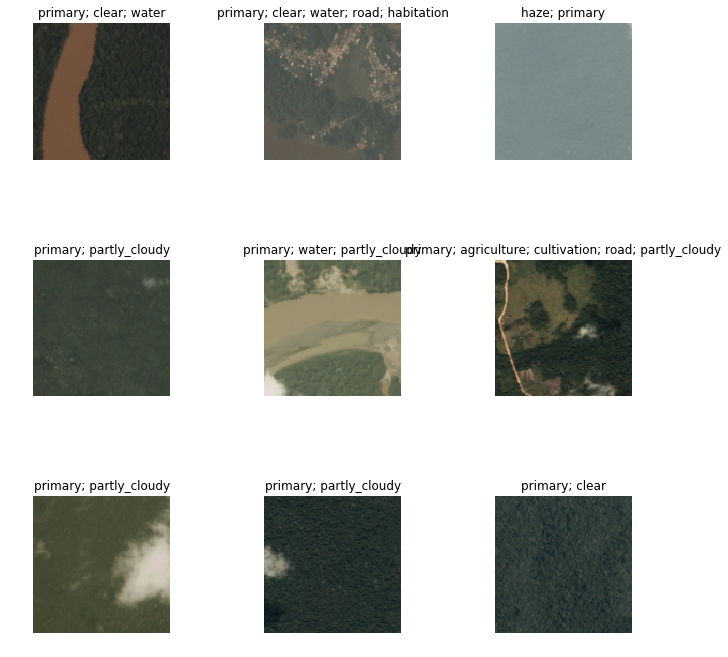

In [11]:
data.show_batch(rows=3, figsize=(10,10))

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet34 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the one that are above a certain threshold (0.5 by default) and comapre them to the ground truth.

As for Fbeta, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details.

In [13]:
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, models.resnet34, metrics=[accuracy_thresh, f_score])

We use the LR Finder to pick a good learning rate.

In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


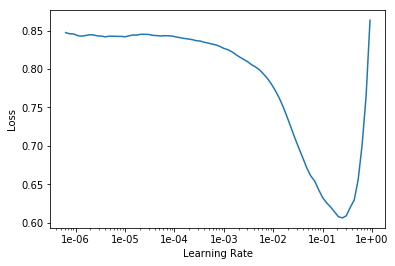

In [19]:
learn.recorder.plot()

Then we can fit the head of our network.

In [20]:
lr = 0.02

In [21]:
learn.fit_one_cycle(5, lr)

Total time: 04:37
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.120897    0.130295    0.952367         0.877430  (00:55)
2      0.121476    0.112471    0.958071         0.895871  (00:55)
3      0.109865    0.106169    0.959714         0.902013  (00:55)
4      0.102760    0.092761    0.964263         0.920063  (00:56)
5      0.096472    0.088529    0.966087         0.923327  (00:55)



In [22]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5, slice(lr/100, lr/5))

Total time: 06:28
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.105038    0.147118    0.962199         0.905595  (01:17)
2      0.102508    0.099857    0.962279         0.914459  (01:17)
3      0.098540    0.092215    0.964422         0.918021  (01:17)
4      0.092891    0.085589    0.966864         0.925726  (01:17)
5      0.087547    0.084467    0.967453         0.927256  (01:17)



In [28]:
learn.fit_one_cycle(5, slice(lr/200, lr/10))

Total time: 06:29
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.088330    0.087817    0.965999         0.926036  (01:16)
2      0.091141    0.088558    0.966079         0.923848  (01:17)
3      0.089396    0.084787    0.966784         0.927307  (01:18)
4      0.084259    0.083302    0.967831         0.928407  (01:18)
5      0.085086    0.082796    0.968172         0.928728  (01:17)



In [31]:
learn.save('rn34-lesson2-trained-base')

In [32]:
doc(data.create)

create [source] create ( train_ds , valid_ds , test_ds = None , path : PathOrStr = '.' , bs : int = 64 , ds_tfms : Union [ Transform , Collection [ Transform ], NoneType ]= None , num_workers : int = 8 , tfms : Optional [ Collection [ Callable ]]= None , device : device = None , collate_fn : Callable = 'data_collate' , size : int = None , kwargs ) → ImageDataBunch 
 
 Factory method. bs batch size, ds_tfms for Dataset , tfms for DataLoader . 
 Show in docs

In [ ]:
data.create(data.train_ds,data.valid_ds,test_ds = )

In [30]:
learn.data

```
np.random.seed(42)
data = (ImageFileList.from_folder(path)            
        .label_from_csv('train_v2.csv', sep=' ', folder='train-jpg', suffix='.jpg')  
        .random_split_by_pct(0.2)
        .datasets(ImageMultiDataset)  
        .transform(tfms, size=128)             
        .databunch()
        .normalize(imagenet_stats))
```

hmm..
```
'test_v2_file_mapping.csv'
'test-jpg'
```

Adding test data. Following the recommendation from here: https://forums.fast.ai/t/general-course-chat/24987/117?u=borz and using the `from_csv` API here: https://docs.fast.ai/vision.data.html#ImageDataBunch.from_csv

In [82]:
data2 = ImageDataBunch.from_csv(path, folder='train-jpg', sep=' ', csv_labels='train_v2.csv',
                        valid_pct=0.2, test='test-jpg', suffix='.jpg')

In [39]:
doc(ImageDataBunch.from_folder)

from_folder [source] from_folder ( path : PathOrStr , train : PathOrStr = 'train' , valid : PathOrStr = 'valid' , test : Union [ Path , str , NoneType ]= None , valid_pct = None , kwargs : Any ) → ImageDataBunch 
 
 Create from imagenet style dataset in path with train , valid , test subfolders (or provide valid_pct ). 
 Show in docs

In [34]:
path

PosixPath('/home/jupyter/.fastai/data/planet')

In [93]:
learn.data = data2

In [87]:
learn.data = data

In [95]:
preds = learn.get_preds(is_test=True)

In [105]:
np.unique(preds[1])

array([0., 1.], dtype=float32)

In [109]:
np.unique(np.argmax(preds[1], axis=1))

array([0])

In [110]:
vpreds = learn.get_preds()

In [111]:
vpreds[1]

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [112]:
np.unique(np.argmax(vpreds[1], axis=1))

array([ 0,  1,  2,  3,  4,  5,  9, 10])

In [113]:
img = open_image(learn.data.train_ds.x[0])

In [115]:
learn.predict(img)

/opt/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1124: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


('slash_burn',
 tensor(8),
 tensor([2.4570e-02, 7.5969e-02, 3.9957e-01, 2.7965e-01, 1.0725e-02, 1.0815e-03,
         2.2352e-03, 7.7865e-05, 6.1923e-01, 3.4487e-04, 5.9353e-06, 7.1072e-04,
         1.4148e-03, 2.1000e-05, 8.2953e-05, 2.7257e-05, 5.8823e-05]))

In [116]:
img = open_image(learn.data.test_ds.x[0])

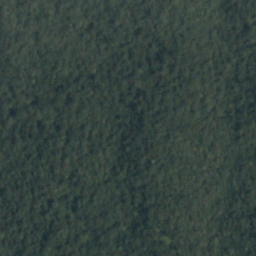

In [117]:
img

In [118]:
learn.predict(img)

('primary',
 tensor(1),
 tensor([0.5642, 0.5893, 0.0711, 0.0497, 0.0328, 0.0105, 0.0047, 0.0001, 0.3290,
         0.0014, 0.0000, 0.0010, 0.0029, 0.0000, 0.0002, 0.0001, 0.0001]))

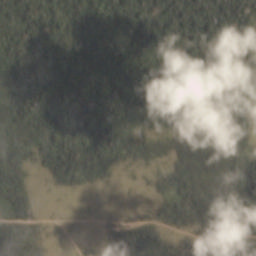

In [121]:
 open_image(learn.data.test_ds.x[1])

In [122]:
learn.predict(open_image(learn.data.test_ds.x[1]))

('primary',
 tensor(1),
 tensor([0.1979, 0.8258, 0.0498, 0.5232, 0.6677, 0.0534, 0.4994, 0.0013, 0.0834,
         0.6616, 0.0005, 0.0081, 0.0290, 0.0003, 0.0003, 0.0005, 0.0006]))

In [123]:
learn.predict(open_image(learn.data.test_ds.x[2]))

('slash_burn',
 tensor(8),
 tensor([1.1842e-02, 5.0089e-02, 5.2006e-01, 4.0031e-01, 5.7035e-03, 4.6506e-04,
         1.4621e-03, 3.3363e-05, 5.5651e-01, 1.1656e-04, 1.6489e-06, 3.6392e-04,
         7.7589e-04, 7.4094e-06, 3.8620e-05, 9.8941e-06, 1.7350e-05]))

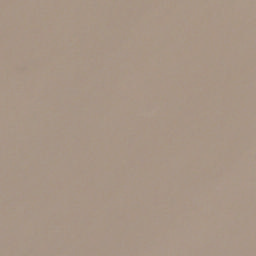

In [124]:
open_image(learn.data.test_ds.x[2])

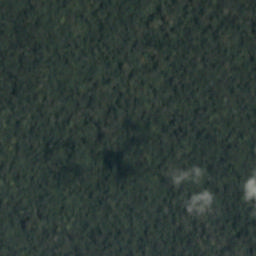

In [125]:
open_image(learn.data.test_ds.x[3])

In [ ]:
preds = learn.get_preds(is_test=True)

In [127]:
preds[0][0]

tensor([0.5642, 0.5893, 0.0711, 0.0497, 0.0328, 0.0105, 0.0047, 0.0001, 0.3290,
        0.0014, 0.0000, 0.0010, 0.0029, 0.0000, 0.0002, 0.0001, 0.0001])

Okay I'm not crazy. learn.get_preds()[0] are the output activations (probs? w/e), and .get_preds()[1] are the actual labels. For the actual test-set, there are no labels, but how do you square that with the fastai API?: just return first index as label. I guess. Makes sense. So, the 1st list of the result is what I want.

In [128]:
predictions = preds[0]

In [129]:
predictions

tensor([[5.6419e-01, 5.8928e-01, 7.1130e-02,  ..., 2.3851e-04, 1.2368e-04,
         5.7474e-05],
        [1.9793e-01, 8.2585e-01, 4.9833e-02,  ..., 2.7685e-04, 4.9662e-04,
         5.5478e-04],
        [1.1842e-02, 5.0089e-02, 5.2006e-01,  ..., 3.8620e-05, 9.8941e-06,
         1.7350e-05],
        ...,
        [7.4102e-01, 9.3295e-01, 2.1989e-01,  ..., 3.3086e-04, 7.4537e-04,
         1.2731e-04],
        [1.7527e-02, 4.5451e-02, 1.6107e-02,  ..., 5.0263e-05, 1.0017e-05,
         2.3837e-05],
        [1.4035e-01, 2.9381e-01, 8.7602e-02,  ..., 4.3030e-04, 1.2975e-04,
         3.0058e-04]])

In [130]:
subm = np.round(predictions)

In [131]:
subm

tensor([[1., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [132]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test_v2_file_mapping.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/models'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg')]

In [135]:
sample_csv = pd.read_csv(path/'train_v2.csv')

In [136]:
sample_csv.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [141]:
learn.data.test_ds.class2idx

{'haze': 0,
 'primary': 1,
 'agriculture': 2,
 'clear': 3,
 'water': 4,
 'habitation': 5,
 'road': 6,
 'cultivation': 7,
 'slash_burn': 8,
 'cloudy': 9,
 'partly_cloudy': 10,
 'conventional_mine': 11,
 'bare_ground': 12,
 'artisinal_mine': 13,
 'blooming': 14,
 'selective_logging': 15,
 'blow_down': 16}

In [146]:
idx2class = {v:k for k,v in learn.data.test_ds.class2idx.items()}

In [147]:
idx2class

{0: 'haze',
 1: 'primary',
 2: 'agriculture',
 3: 'clear',
 4: 'water',
 5: 'habitation',
 6: 'road',
 7: 'cultivation',
 8: 'slash_burn',
 9: 'cloudy',
 10: 'partly_cloudy',
 11: 'conventional_mine',
 12: 'bare_ground',
 13: 'artisinal_mine',
 14: 'blooming',
 15: 'selective_logging',
 16: 'blow_down'}

In [152]:
'_'.join(list(map(str, [1,2,3])))

'1_2_3'

In [150]:
['_'.join(str(i)) for i in range(10)]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [138]:
subm_df = pd.DataFrame(columns=['image_name','tags'])

In [156]:
np.where(subm[0]==1)[0]

array([0, 1])

In [159]:
fnames = [f.name for f in (path/'test-jpg').ls()]
# fpreds = [['_'.join(str(idx2class[i]) for i in np.where(subrow==1)] for subrow in subm]
fpreds = [' '.join([str(idx2class[i]) for i in np.where(subrow==1)[0]]) for subrow in subm]

In [165]:
fpreds[:12]

['haze primary',
 'primary clear water cloudy',
 'agriculture slash_burn',
 'primary',
 'agriculture',
 'primary clear',
 'haze primary',
 'slash_burn',
 'slash_burn',
 'slash_burn',
 '',
 'slash_burn']

little verification step. I *think* the labels are suposed to be in asc ordering. I don't know exactly how the files are ordered by path.ls(), I don't know if it's consistent (I think it is), and I don't know if the `learn.data.test_ds` gets them in that same order (I think it does).

So I'm going to verify that the filenames match up, then I'm going to reordering them.

In [168]:
learn.data.test_ds.x[0]

PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17412.jpg')

In [170]:
# if this is silent: all good
assert list(learn.data.test_ds.x) == (path/'test-jpg').ls()

In [173]:
learn.data.test_ds.x[:10] == (path/'test-jpg').ls()[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [174]:
learn.data.test_ds.x[:5], (path/'test-jpg').ls()[:5]

(array([PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17412.jpg'),
        PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17884.jpg'),
        PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_34419.jpg'),
        PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_31589.jpg'),
        PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_1133.jpg')], dtype=object),
 [PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17412.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17884.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_34419.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_31589.jpg'),
  PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_1133.jpg')])

So they're in the same order. Now to put them in the order I'm guessing the competition wanted them in. Of course, I think I could've just called a sort function on the learners data object before running inference. An easy way to do this now is to just build the dataframe and sort it.

In [175]:
subm_df.image_name = fnames
subm_df.tags = fpreds

In [177]:
subm_df.head()

,image_name,tags
0,test_17412.jpg,haze primary
1,test_17884.jpg,primary clear water cloudy
2,test_34419.jpg,agriculture slash_burn
3,test_31589.jpg,primary
4,test_1133.jpg,agriculture


In [193]:
subm_df.sort_values(by='image_name').head()

,image_name,tags
20648,test_0.jpg,slash_burn
39017,test_1.jpg,haze primary
34952,test_10.jpg,primary
39174,test_100.jpg,haze primary clear water
32488,test_1000.jpg,haze primary agriculture clear


Okay, I'm sure there is a 'test_2.jpg' that's being sorted after 'test_1000.jpg' ... What I can do is create a dictionary and sort its keys filtering out the number value. I think.

In [194]:
subm_dict = subm_df.to_dict()

In [198]:
subm_dict.keys()

dict_keys(['image_name', 'tags'])

In [205]:
list(subm_dict['image_name'].keys())[:10], list(subm_dict['tags'].keys())[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Too complicated, I can easier start over:

In [208]:
fnames[:10]

['test_17412.jpg',
 'test_17884.jpg',
 'test_34419.jpg',
 'test_31589.jpg',
 'test_1133.jpg',
 'test_30881.jpg',
 'test_21788.jpg',
 'test_456.jpg',
 'test_36959.jpg',
 'test_31894.jpg']

This is what I want:

In [214]:
sorted(fnames, key=lambda x: int(x.split('_')[-1].split('.')[0]))[:15]

['test_0.jpg',
 'test_1.jpg',
 'test_2.jpg',
 'test_3.jpg',
 'test_4.jpg',
 'test_5.jpg',
 'test_6.jpg',
 'test_7.jpg',
 'test_8.jpg',
 'test_9.jpg',
 'test_10.jpg',
 'test_11.jpg',
 'test_12.jpg',
 'test_13.jpg',
 'test_14.jpg']

In [216]:
subm_dict = {fname:fpred for fname,fpred in zip(fnames,fpreds)}

In [221]:
subm_ordering = sorted(fnames, key=lambda x: int(x.split('_')[-1].split('.')[0]))

In [222]:
subm_df.image_name = subm_ordering
subm_df.tags = [subm_dict[fname] for fname in subm_df.image_name]

In [224]:
subm_df.head(n=15)

,image_name,tags
0,test_0.jpg,slash_burn
1,test_1.jpg,haze primary
2,test_2.jpg,slash_burn
3,test_3.jpg,
4,test_4.jpg,slash_burn
5,test_5.jpg,haze primary
6,test_6.jpg,agriculture clear
7,test_7.jpg,primary water
8,test_8.jpg,slash_burn
9,test_9.jpg,agriculture slash_burn


woo, finally.

In [225]:
path

PosixPath('/home/jupyter/.fastai/data/planet')

In [227]:
sub_name = 'planet_rn34_rn34_basic_trained_fastai_20181104.csv'

In [229]:
os.mkdir(path/'submissions')

In [230]:
subm_df.to_csv(path/'submissions/'/sub_name, index=False, )

In [231]:
! echo {path}/submissions/{sub_name}

/home/jupyter/.fastai/data/planet/submissions/planet_rn34_rn34_basic_trained_fastai_20181104.csv


In [235]:
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run"

100%|██████████████████████████████████████| 1.14M/1.14M [00:00<00:00, 1.36MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

It failed on Kaggle... oh... I'm supposed to have the additional test data in there?

My submission has 40k images instead of 60k..

I suppose also that I don't need the test-v2 file mapping. I hope.

Let's see.

In [237]:
# download
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
# decompress & clean
! 7za -bd -y x {path}/test-jpg-additional.tar.7z -o{path}
! tar -xf {path}/test-jpg-additional.tar -C {path}
! rm {path}/*.7z
! rm {path}/*.tar

test-jpg-additional.tar.7z: Skipping, found more recently modified local copy (use --force to force download)

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
1 file, 318407195 bytes (304 MiB)

Extracting archive: /home/jupyter/.fastai/data/planet/test-jpg-additional.tar.7z
--
Path = /home/jupyter/.fastai/data/planet/test-jpg-additional.tar.7z
Type = 7z
Physical Size = 318407195
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

Everything is Ok

Size:       336865280
Compressed: 318407195


In [240]:
!ls {path}/test-jpg-additional | wc -l

20522


In [241]:
!ls {path}/test-jpg | wc -l

40669


In [246]:
(path/'test-jpg-additional').ls()[:10]

[PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_11457.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_11115.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_10822.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_11610.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_1911.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_12567.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_3847.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_6289.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_18426.jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional/file_488.jpg')]

Oh. So I will need the mappings file. That's annoying. I don't remember it being this complicated in the past. I *really* hope this just means sorting and starting the count from 40k onwards...

In [248]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/submissions'),
 PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/test_v2_file_mapping.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg-additional'),
 PosixPath('/home/jupyter/.fastai/data/planet/models'),
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg')]

In [249]:
pd.read_csv(path/'test_v2_file_mapping.csv').head()

,old,new
0,file_4158.tif,file_18830.tif
1,file_1668.tif,file_19164.tif
2,file_2411.tif,file_15749.tif
3,file_16047.tif,file_7531.tif
4,file_1271.tif,file_18347.tif


Wtf. Is this the same for jpgs?

In [250]:
df_mappings = pd.read_csv(path/'test_v2_file_mapping.csv')
len(df_mappings)

20522

Did I read somewhere that they screwed up the ordering of the tiff images? I hope so. Can I just sort the new files onto the end? Let's see...

In [251]:
data3 = ImageDataBunch.from_csv(path, folder='train-jpg', sep=' ', csv_labels='train_v2.csv',
                        valid_pct=0.2, test='test-jpg-additional', suffix='.jpg')

In [252]:
learn.data = data3

In [253]:
preds = learn.get_preds(is_test=True)[0]

/opt/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1124: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [258]:
subm = np.round(preds)
fpreds = [' '.join([str(idx2class[i]) for i in np.where(subrow==1)[0]]) for subrow in subm]

In [259]:
len(fpreds)

20522

In [260]:
fnames = [f.name for f in (path/'test-jpg-additional').ls()]

In [262]:
assert len(fnames) == len(fpreds)

In [263]:
subm_dict = {fname:fpred for fname,fpred in zip(fnames,fpreds)}

In [264]:
subm_ordering = sorted(fnames, key=lambda x: int(x.split('_')[-1].split('.')[0]))

In [277]:
subm_adtl_df = pd.DataFrame(columns=subm_df.columns)

In [278]:
subm_adtl_df

,image_name,tags


In [279]:
subm_ordering[:10]

['file_0.jpg',
 'file_1.jpg',
 'file_2.jpg',
 'file_3.jpg',
 'file_4.jpg',
 'file_5.jpg',
 'file_6.jpg',
 'file_7.jpg',
 'file_8.jpg',
 'file_9.jpg']

In [280]:
subm_adtl_df.image_name = subm_ordering
subm_adtl_df.tags = [subm_dict[fname] for fname in subm_ordering]

In [282]:
subm_adtl_df.head(n=14)

,image_name,tags
0,file_0.jpg,haze primary
1,file_1.jpg,primary clear water cloudy
2,file_2.jpg,agriculture
3,file_3.jpg,
4,file_4.jpg,haze primary water road
5,file_5.jpg,
6,file_6.jpg,primary
7,file_7.jpg,haze primary
8,file_8.jpg,haze primary clear
9,file_9.jpg,slash_burn


In [283]:
subm__final_df = pd.concat((subm_df, subm_adtl_df), ignore_index=True)

In [284]:
len(subm__final_df)

61191

In [285]:
sub_name = 'planet_rn34_basic_trained_fastai_20181104_1.csv'

In [288]:
os.makedirs(path/'submissions', exist_ok=True)

In [289]:
subm__final_df.to_csv(path/'submissions/'/sub_name, index=False, )

In [290]:
! echo {path}/submissions/{sub_name}

/home/jupyter/.fastai/data/planet/submissions/planet_rn34_basic_trained_fastai_20181104_1.csv


In [291]:
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run"

100%|██████████████████████████████████████| 1.72M/1.72M [00:00<00:00, 2.24MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

Damnit. Can't have the '.jpg' in the CSV.

In [293]:
subm__final_df.image_name = [fname.split('.')[0] for fname in subm__final_df.image_name]

In [294]:
subm__final_df.to_csv(path/'submissions/'/sub_name, index=False, )

In [295]:
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run"

100%|██████████████████████████████████████| 1.48M/1.48M [00:00<00:00, 1.91MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

And that one got in with a score of 0.2699.... which is... place 933 out of 938. What. The fuck.

Okay. This is the fucker I need:

In [298]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f sample_submission_v2.csv -p {path}
! unzip {path}/sample_submission_v2.csv.zip -d {path}
! rm {path}/*.zip

sample_submission_v2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /home/jupyter/.fastai/data/planet/sample_submission_v2.csv.zip
  inflating: /home/jupyter/.fastai/data/planet/sample_submission_v2.csv  
  inflating: /home/jupyter/.fastai/data/planet/__MACOSX/._sample_submission_v2.csv  


In [299]:
df = pd.read_csv(path/'sample_submission_v2.csv')

In [304]:
df.image_name[:15]

0      test_0
1      test_1
2      test_2
3      test_3
4      test_4
5      test_5
6      test_6
7      test_7
8      test_8
9      test_9
10    test_10
11    test_11
12    test_12
13    test_13
14    test_14
Name: image_name, dtype: object

Great. But I've overwritten my predictions on the first set of data. Time to do this again.

In [303]:
del data2
del data3

In [310]:
data_1 = ImageDataBunch.from_csv(path, folder='train-jpg', sep=' ', csv_labels='train_v2.csv',
                        valid_pct=0.2, test='test-jpg', suffix='.jpg')
data_2 = ImageDataBunch.from_csv(path, folder='train-jpg', sep=' ', csv_labels='train_v2.csv',
                        valid_pct=0.2, test='test-jpg-additional', suffix='.jpg')

learn.data = data_1
preds_1 = learn.get_preds(is_test=True)[0]

learn.data = data_2
preds_2 = learn.get_preds(is_test=True)[0]

In [314]:
fpreds_1 = [' '.join([str(idx2class[i]) for i in np.where(subrow==1)[0]]) for subrow in np.round(preds_1)]
fpreds_2 = [' '.join([str(idx2class[i]) for i in np.where(subrow==1)[0]]) for subrow in np.round(preds_2)]

In [315]:
fnames_1 = [f.name for f in (path/'test-jpg').ls()]
fnames_2 = [f.name for f in (path/'test-jpg-additional').ls()]

In [316]:
assert len(fnames_1) == len(fpreds_1); assert len(fnames_2) == len(fpreds_2); 

In [321]:
subm_dict = {fname.split('.')[0]:fpred for fname,fpred in zip(fnames_1,fpreds_1)}
for fname,fpred in zip(fnames_2,fpreds_2):
    subm_dict[fname.split('.')[0]] = fpred

In [324]:
tags_col = []
for fname in df.image_name:
    tags_col.append(subm_dict[fname])
df.tags = tags_col

In [325]:
df.head()

,image_name,tags
0,test_0,slash_burn
1,test_1,haze primary
2,test_2,slash_burn
3,test_3,
4,test_4,slash_burn


In [327]:
sub_name = 'planet_rn34_basic_trained_fastai_20181104_2.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run"

100%|██████████████████████████████████████| 1.48M/1.48M [00:00<00:00, 2.32MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

Same score... 

In [328]:
learn.data.classes

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

So... maybe those predictions and filenames didn't have to be in any order? Because here's a sample output from an old submission I did a year ago:
```
	image_name	tags
0	test_26652  cloudy haze partly_cloudy primary
1	test_7690   agriculture clear cultivation primary
2	test_5862   agriculture partly_cloudy primary water
3	test_7729   agriculture clear cultivation habitation prima...
4	test_20034  clear haze primary
```

and it got around 0.90 on the private leaderboard....

Here's a quick test to check that. Sorting with pandas will sort alphabetically:

In [342]:
df.sort_values(by='image_name').head()

,image_name,tags
40669,file_0,haze primary
40670,file_1,primary clear water cloudy
40671,file_10,primary agriculture clear road
40672,file_100,haze primary
40673,file_1000,haze primary


In [345]:
sub_name = 'planet_rn34_basic_trained_fastai_20181104_2_resorted.csv'
df.sort_values(by='image_name').to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run"

100%|██████████████████████████████████████| 1.48M/1.48M [00:00<00:00, 1.75MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

And it gets the exact same score. 0.2699. So the row-ordering doesn't matter at all. Which means my predictions suck. Cool. That may or may not be it, but it may be. I could also be thresholding the outputs wrong. Anyway, I'll come back to this tomorrow, and with a clean notebook.

But first, a quick thresholding experiment:

In [346]:
fpreds_1 = [' '.join([str(idx2class[i]) for i in np.where(subrow>=0.3)[0]]) for subrow in preds_1]
fpreds_2 = [' '.join([str(idx2class[i]) for i in np.where(subrow>=0.3)[0]]) for subrow in preds_2]

In [347]:
fnames_1 = [f.name for f in (path/'test-jpg').ls()]
fnames_2 = [f.name for f in (path/'test-jpg-additional').ls()]

In [348]:
assert len(fnames_1) == len(fpreds_1); assert len(fnames_2) == len(fpreds_2); 

In [349]:
subm_dict = {fname.split('.')[0]:fpred for fname,fpred in zip(fnames_1,fpreds_1)}
for fname,fpred in zip(fnames_2,fpreds_2):
    subm_dict[fname.split('.')[0]] = fpred

In [350]:
tags_col = []
for fname in df.image_name:
    tags_col.append(subm_dict[fname])
df.tags = tags_col

In [351]:
df.head()

,image_name,tags
0,test_0,agriculture clear slash_burn
1,test_1,haze primary
2,test_2,slash_burn
3,test_3,haze primary slash_burn
4,test_4,slash_burn


In [352]:
sub_name = 'planet_rn34_basic_trained_fastai_20181104_3.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run; threshold=0.3"

100%|██████████████████████████████████████| 2.11M/2.11M [00:00<00:00, 2.72MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

And that gets 0.41056... Hmm..

In [353]:
# this of course requires the above to already by set up
def adjust_threshold(th):

    fpreds_1 = [' '.join([str(idx2class[i]) for i in np.where(subrow>=th)[0]]) for subrow in preds_1]
    fpreds_2 = [' '.join([str(idx2class[i]) for i in np.where(subrow>=th)[0]]) for subrow in preds_2]

    fnames_1 = [f.name for f in (path/'test-jpg').ls()]
    fnames_2 = [f.name for f in (path/'test-jpg-additional').ls()]

    assert len(fnames_1) == len(fpreds_1); assert len(fnames_2) == len(fpreds_2); 

    subm_dict = {fname.split('.')[0]:fpred for fname,fpred in zip(fnames_1,fpreds_1)}
    for fname,fpred in zip(fnames_2,fpreds_2):
        subm_dict[fname.split('.')[0]] = fpred

    tags_col = []
    for fname in df.image_name:
        tags_col.append(subm_dict[fname])
    df.tags = tags_col

    return df

In [356]:
th = 0.2
df = adjust_threshold(th)

In [357]:
sub_name = f'planet_rn34_basic_trained_fastai_20181104_3_th{th}.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run; threshold=0.2"

100%|██████████████████████████████████████| 2.44M/2.44M [00:01<00:00, 1.51MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

0.4895

In [358]:
th = 0.1
df = adjust_threshold(th)

In [359]:
sub_name = f'planet_rn34_basic_trained_fastai_20181104_3_th{th}.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run; threshold="{th}

100%|██████████████████████████████████████| 2.94M/2.94M [00:00<00:00, 3.37MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

0.56866

In [360]:
th = 0.05
df = adjust_threshold(th)

In [361]:
sub_name = f'planet_rn34_basic_trained_fastai_20181104_3_th{th}.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run; threshold="{th}

100%|██████████████████████████████████████| 3.43M/3.43M [00:00<00:00, 3.89MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

0.62669

In [362]:
th = 0.025
df = adjust_threshold(th)

In [363]:
sub_name = f'planet_rn34_basic_trained_fastai_20181104_3_th{th}.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run; threshold="{th}

100%|██████████████████████████████████████| 3.85M/3.85M [00:00<00:00, 4.76MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

0.62698

In [364]:
th = 0.035
df = adjust_threshold(th)

In [365]:
sub_name = f'planet_rn34_basic_trained_fastai_20181104_3_th{th}.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run; threshold="{th}

100%|██████████████████████████████████████| 3.64M/3.64M [00:01<00:00, 3.25MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

0.62907

In [366]:
th = 0.04
df = adjust_threshold(th)

In [367]:
sub_name = f'planet_rn34_basic_trained_fastai_20181104_3_th{th}.csv'
df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "1st fastai 1.0.X submission; RN34; test run; threshold="{th}

100%|██████████████████████████████████████| 3.56M/3.56M [00:00<00:00, 4.04MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

0.62926

Cool. So more training, and more disciplined and clean training, tomorrow.